In [1]:
#importing libraies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset
path = '/content/drive/MyDrive/projects/the_spark_foundation_internship/2_Prediction_using_unsupervised_ML/Iris.csv'
df = pd.read_csv(path)

In [3]:
#viewing first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#viewing dataframe shape
df.shape

(150, 6)

In [5]:
#viewing dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#viewing dataframe description
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#sum of null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#checking for duplicated values
df.duplicated().sum()

0

In [9]:
#dropping Id column because it's unique and will interfer with our learning process
#df.reset_index(drop=True, inplace=True)
df.drop(['Id'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:

df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [11]:
#importing LabelEncoder to encode our data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# Data visuaization

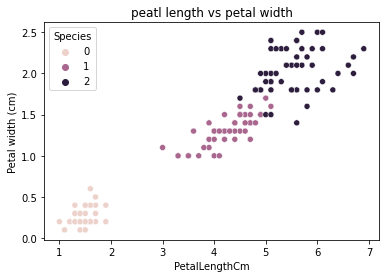

In [12]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')
plt.ylabel('Petal lenght (cm)')
plt.ylabel('Petal width (cm)')
plt.title('peatl length vs petal width')
plt.show()


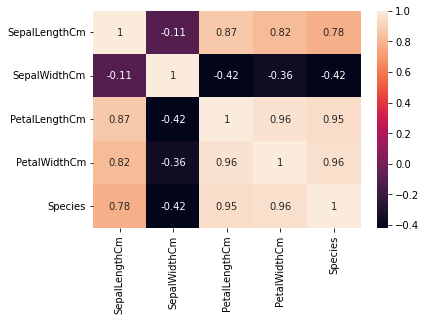

In [13]:
sns.heatmap(df.corr(),annot=True)


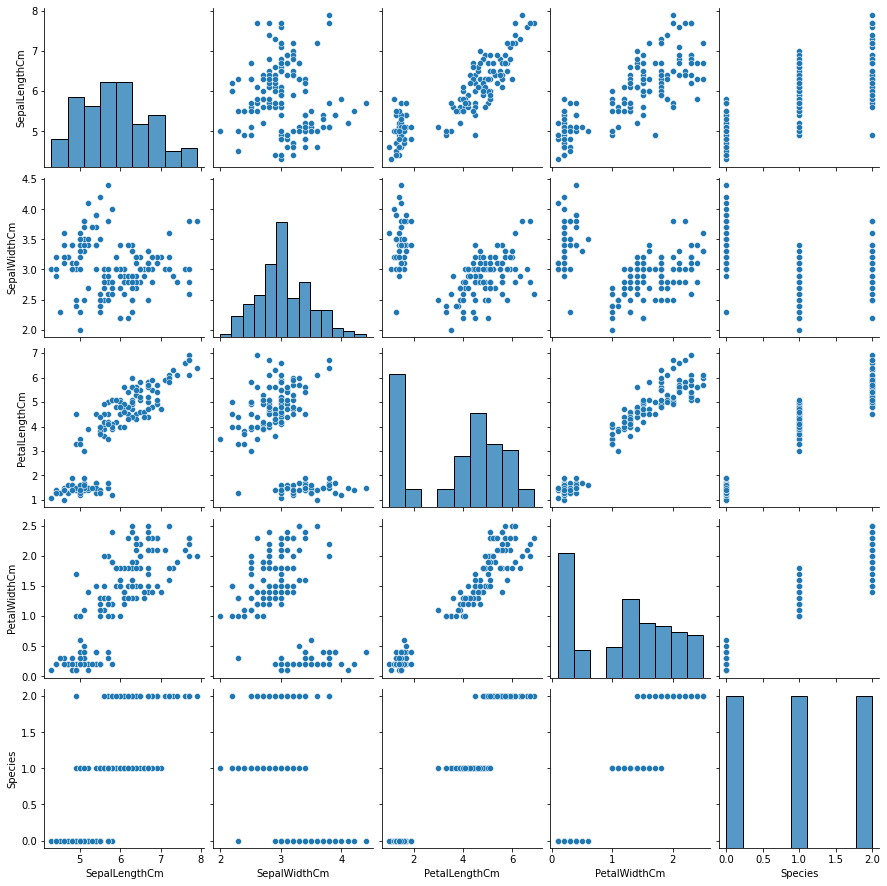

In [14]:
sns.pairplot(df)


In [15]:
#Elbow Method using within-cluster-sum-of-squares(wcss)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[780.8244000000001,
 179.12221033868093,
 87.31002785114046,
 66.97905140650855,
 50.41949126984127,
 42.77019525844526,
 35.40031968233056,
 31.255435242696112,
 29.07695663634823,
 26.857226362596215]

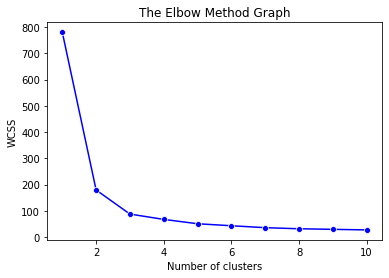

In [16]:
#Using Elbow graph to find optimum no. of Clusters
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='blue')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#using KMeans clustering
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(df)
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

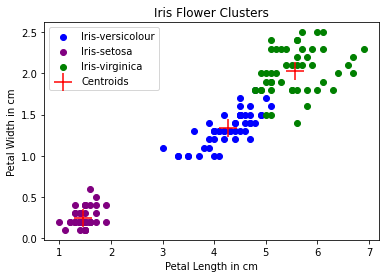

In [18]:
#concerting the df into numpy array
df = np.array(df)

centroids = kmeans.cluster_centers_
#ploting the clusters and centroids
plt.title('Clusters with Centroids')
plt.scatter(df[label == 0, 2], df[label == 0, 3], c='blue', label='Iris-versicolour')
plt.scatter(df[label == 1, 2], df[label == 1, 3], c='purple', label='Iris-setosa')
plt.scatter(df[label == 2, 2], df[label == 2, 3], c='green', label='Iris-virginica')
plt.scatter(centroids[:, 2], centroids[:,3], s= 300, c='red', marker='+', label='Centroids')

plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')

plt.legend()
plt.show();

The predicted graph is quite similar to the actual one.